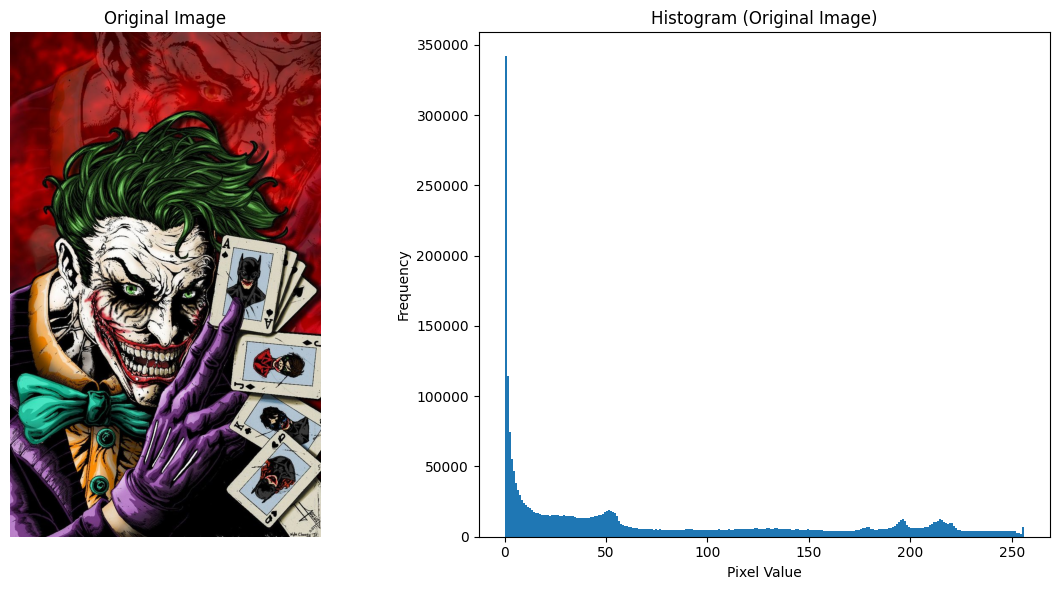

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Downloads/jok.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(image_rgb.ravel(), bins=256, range=(0, 256))
plt.title('Histogram (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

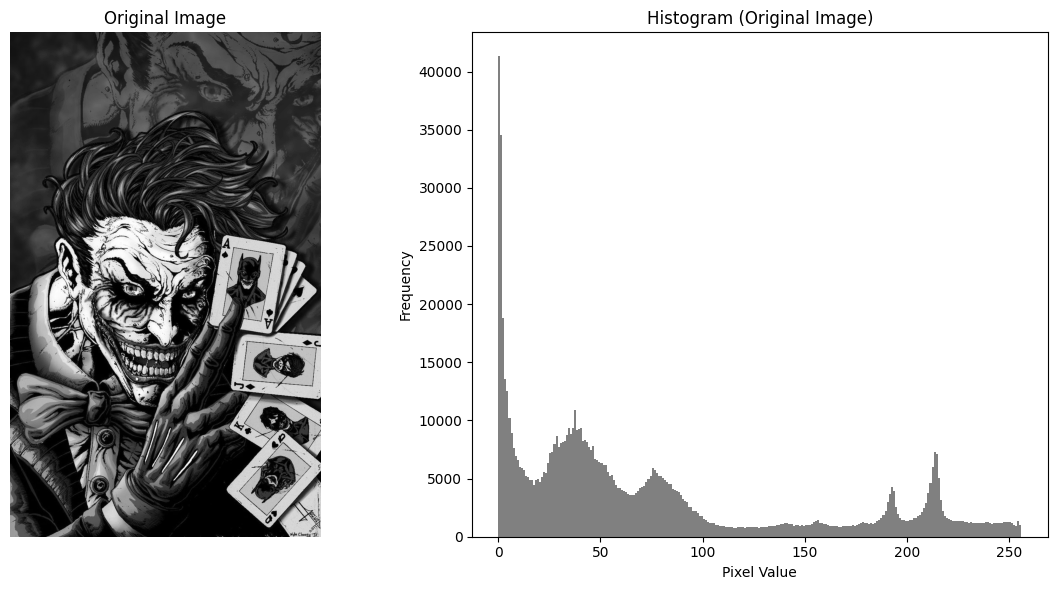

In [2]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



**Sharpened Image**

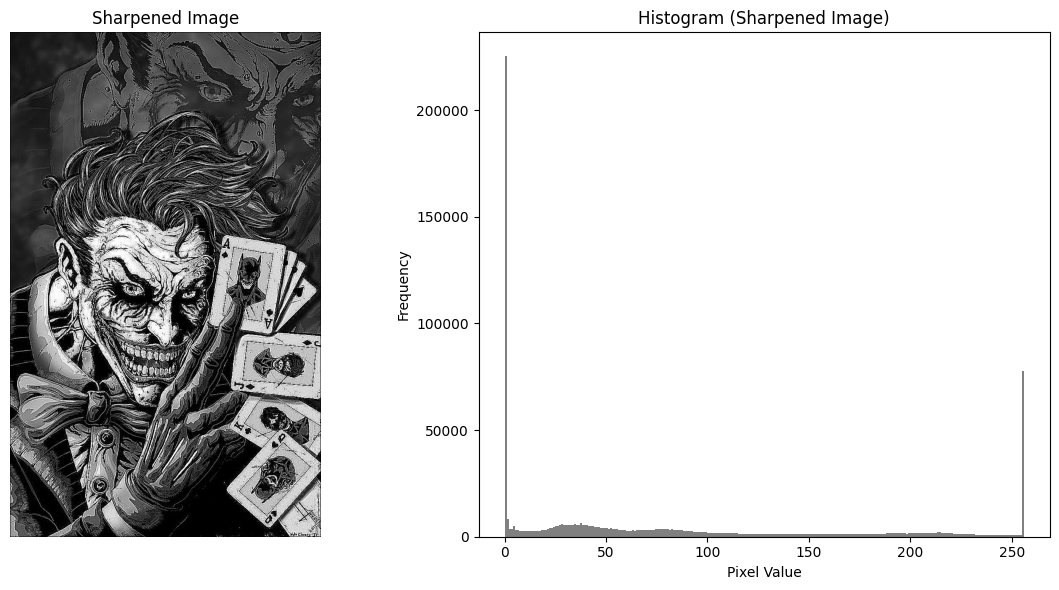

In [22]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpened_image = np.zeros_like(image_gray)

height, width = image_gray.shape

for i in range(1, height-1):
    for j in range(1, width-1):
       
        region = image_gray[i-1:i+2, j-1:j+2]
    
        new_value = np.sum(region * kernel)
     
        sharpened_image[i, j] = np.clip(new_value, 0, 255) 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(sharpened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Sharpened Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Smoothed Image**

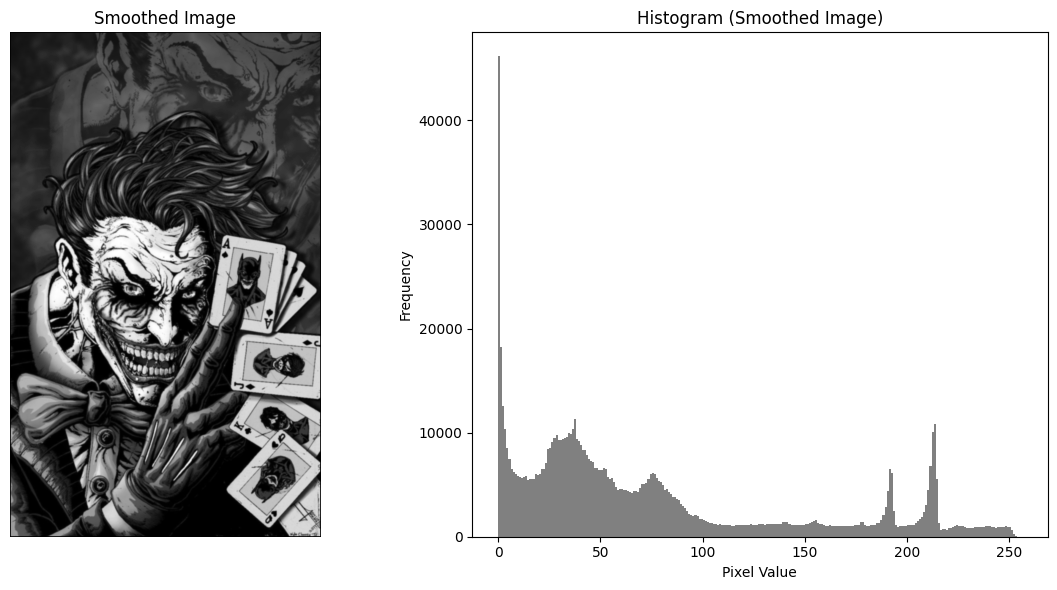

In [23]:
def gaussian_kernel(size, sigma):
    
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(- ((x - (size-1)//2)**2 + (y - (size-1)//2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)

smoothed_image = np.zeros_like(image_gray)

for i in range(2, image_gray.shape[0] - 2):
    for j in range(2, image_gray.shape[1] - 2):
        region = image_gray[i-2:i+3, j-2:j+3]
        smoothed_image[i, j] = np.sum(region * kernel)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(smoothed_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Smoothed Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Blurred Image**

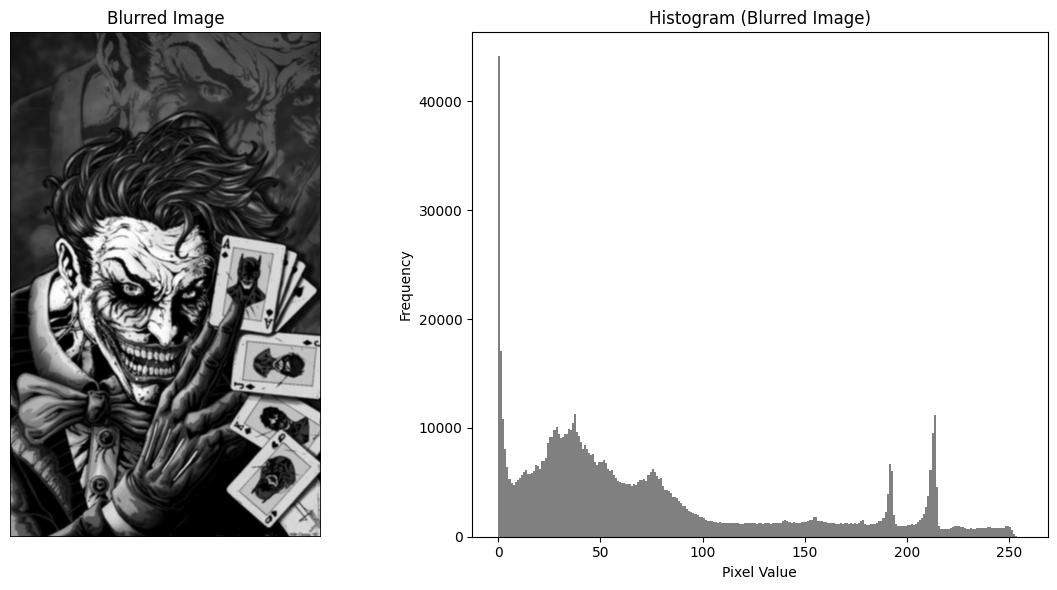

In [24]:

def box_blur(image, kernel_size=5):
    height, width = image.shape
    blurred_image = np.zeros_like(image)

    for i in range(kernel_size//2, height - kernel_size//2):
        for j in range(kernel_size//2, width - kernel_size//2):
            region = image[i - kernel_size//2:i + kernel_size//2 + 1, j - kernel_size//2:j + kernel_size//2 + 1]
            blurred_image[i, j] = np.mean(region)

    return blurred_image

blurred_image = box_blur(image_gray, kernel_size=5)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(blurred_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Blurred Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Brightened Image**

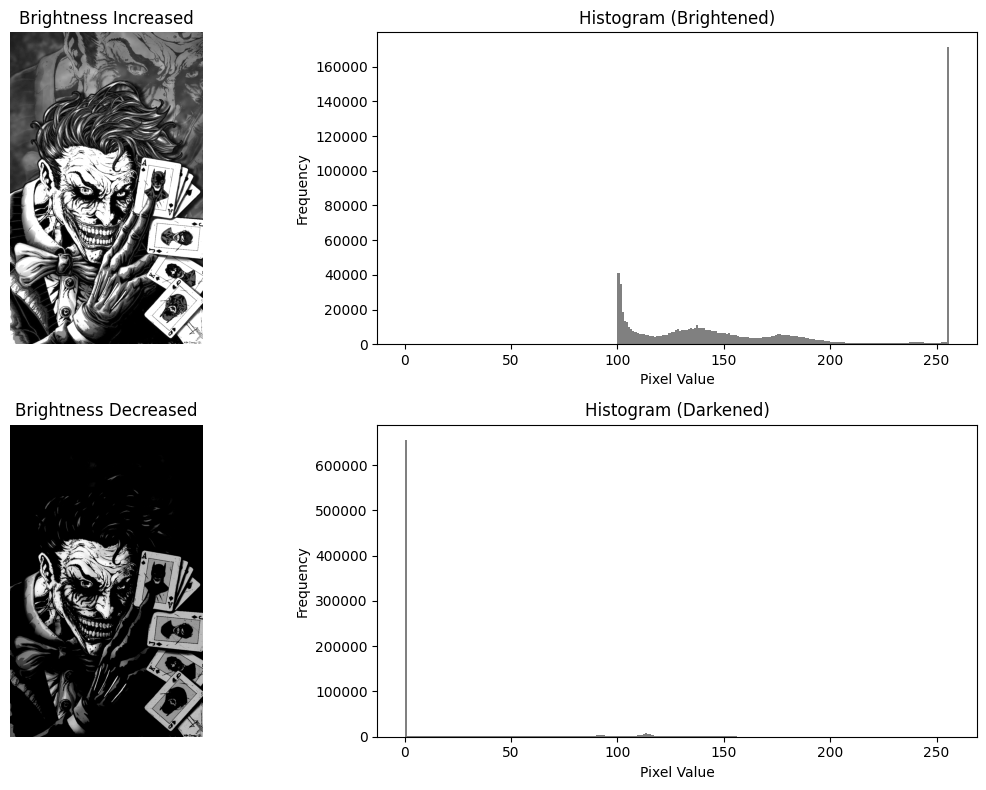

In [5]:

def adjust_brightness(image, beta):
    image = image.astype(np.int16) 
    brightened_image = image + beta  
    brightened_image = np.clip(brightened_image, 0, 255) 
    return brightened_image.astype(np.uint8) 




brightened_image = adjust_brightness(image_gray, beta=100)
darkened_image = adjust_brightness(image_gray, beta=-100)


plt.figure(figsize=(12, 8))


plt.subplot(2,2,1)
plt.imshow(brightened_image, cmap='gray')
plt.title('Brightness Increased')
plt.axis('off')

plt.subplot(2,2,2)
plt.hist(brightened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Brightened)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.imshow(darkened_image, cmap='gray')
plt.title('Brightness Decreased')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(darkened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Darkened)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Contrasted Image**

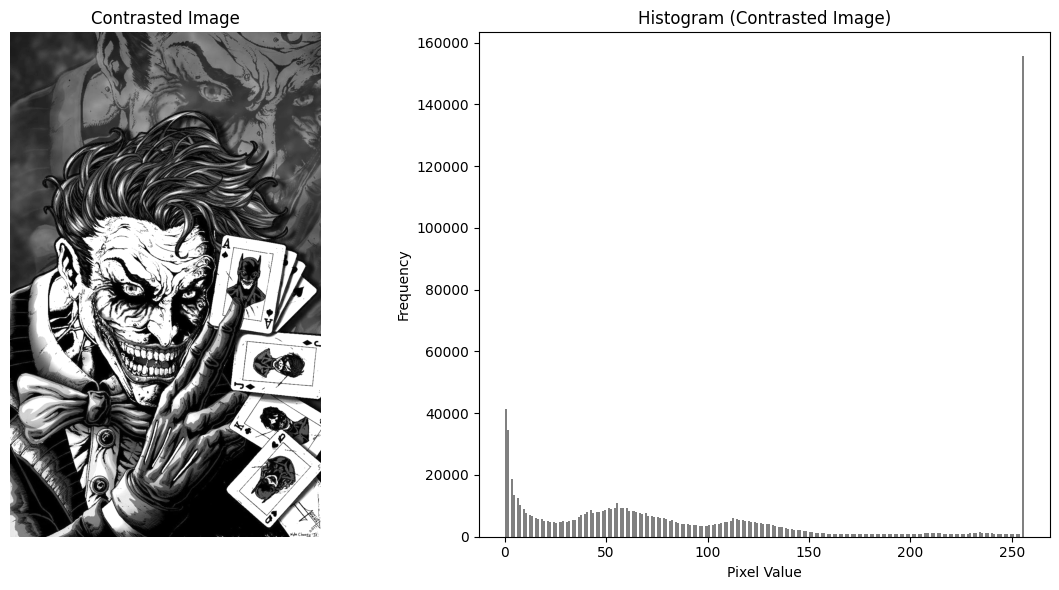

In [26]:
def adjust_contrast(image, alpha=1.5, beta=0):
    contrasted_image = np.zeros_like(image)

  
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
           
            new_value = alpha * image[i, j] + beta

          
            if new_value > 255:
                contrasted_image[i, j] = 255
            elif new_value < 0:
                contrasted_image[i, j] = 0
            else:
                contrasted_image[i, j] = new_value

    return contrasted_image

contrasted_image = adjust_contrast(image_gray, alpha=1.5, beta=0)
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(contrasted_image, cmap='gray')
plt.title('Contrasted Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(contrasted_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Contrasted Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Thresholded Image**

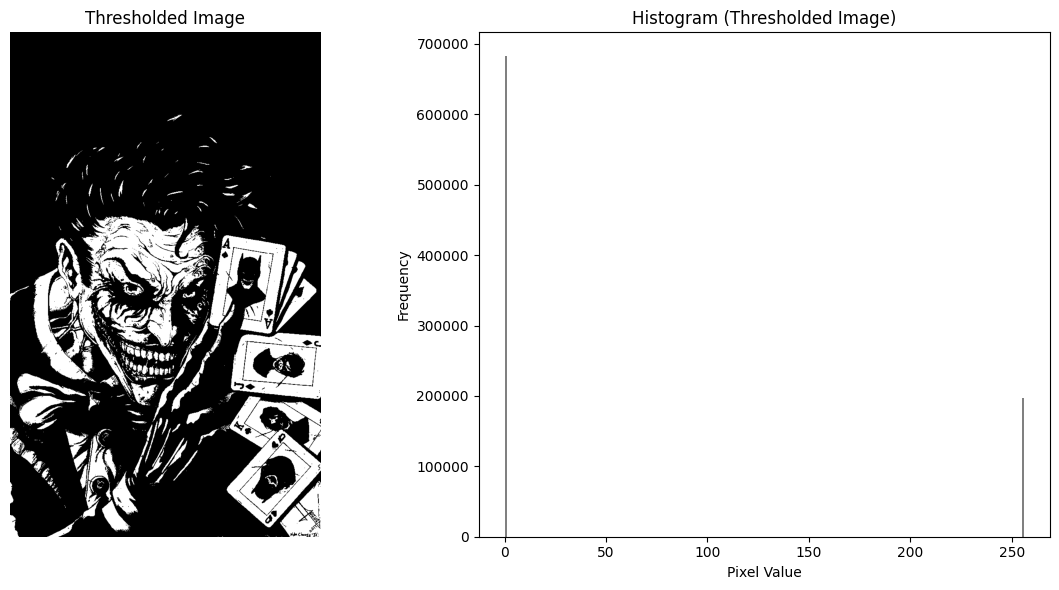

In [27]:

def threshold_image(image, thresh_value=128):
    thresholded_img = np.zeros_like(image)
    thresholded_img[image > thresh_value] = 255
    return thresholded_img

thresholded_image = threshold_image(image_gray)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(thresholded_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Thresholded Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Negative Image**

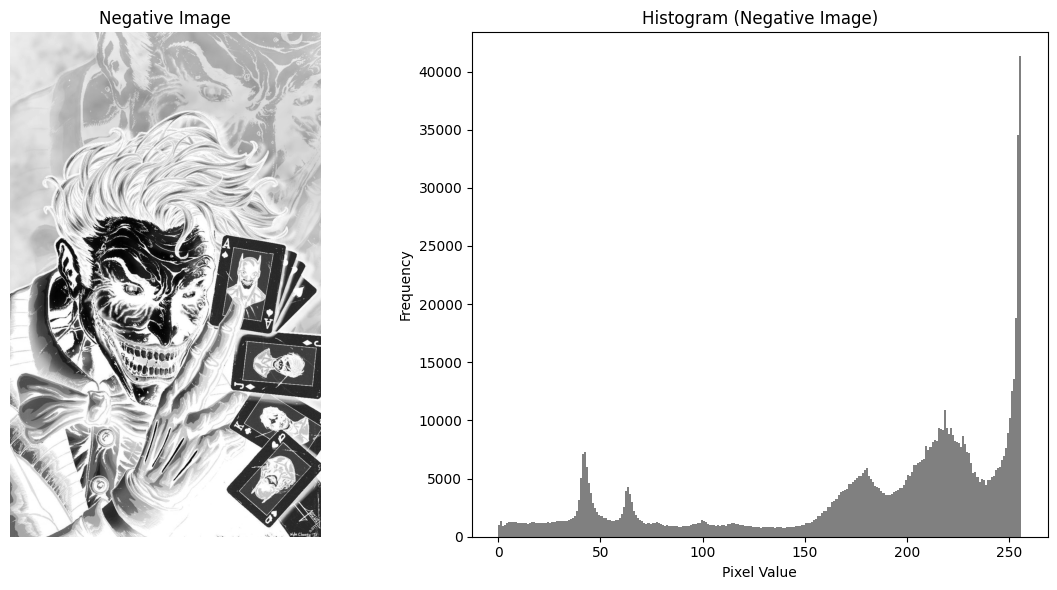

In [28]:

def negative_image(image):
    return 255 - image

negative_img = negative_image(image_gray)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(negative_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Negative Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Magnitude Spectrum (DFT)**

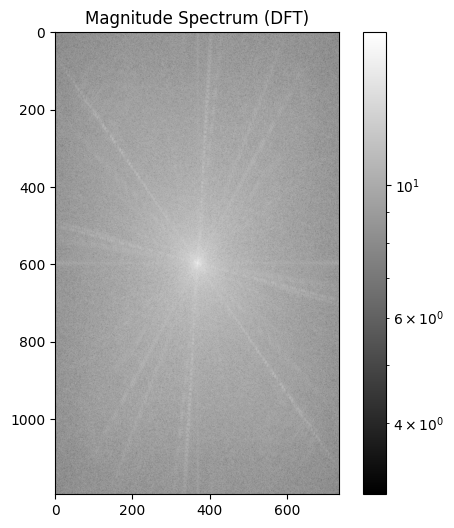

In [29]:
def plot_dft(image):
  
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    magnitude_spectrum = np.abs(dft_shift)
    
    magnitude_spectrum_log = np.log(magnitude_spectrum + 1)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude_spectrum_log, cmap='gray', norm=LogNorm())
    plt.title('Magnitude Spectrum (DFT)')
    plt.colorbar()
    plt.show()

plot_dft(image_gray)


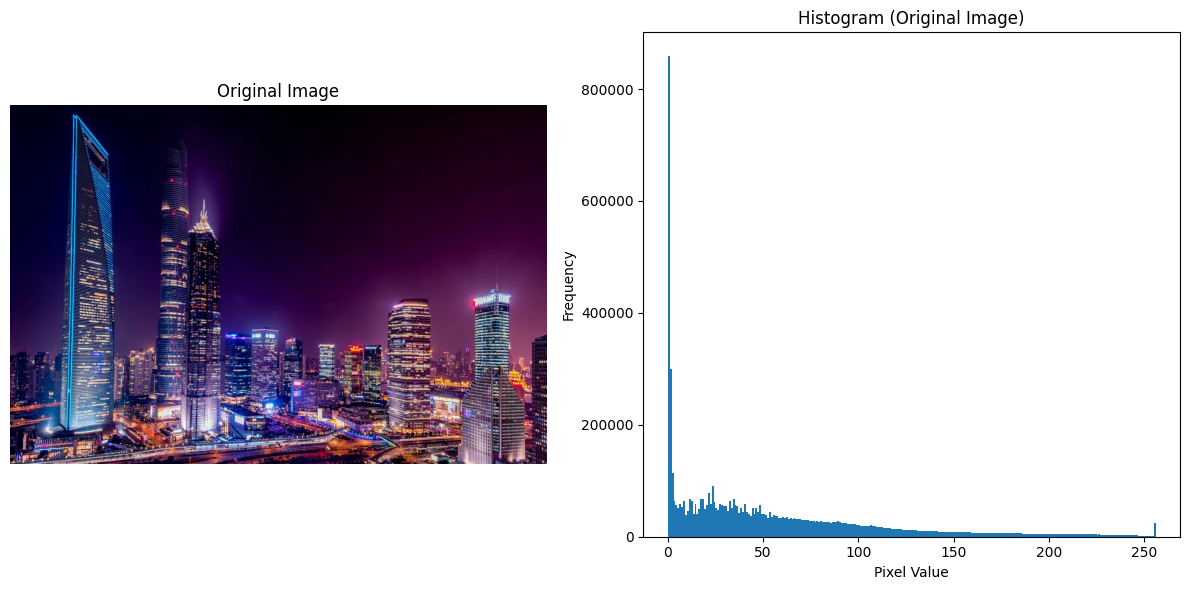

In [40]:
image2 = cv2.imread('Downloads/imag.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(image_rgb.ravel(), bins=256, range=(0, 256))
plt.title('Histogram (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

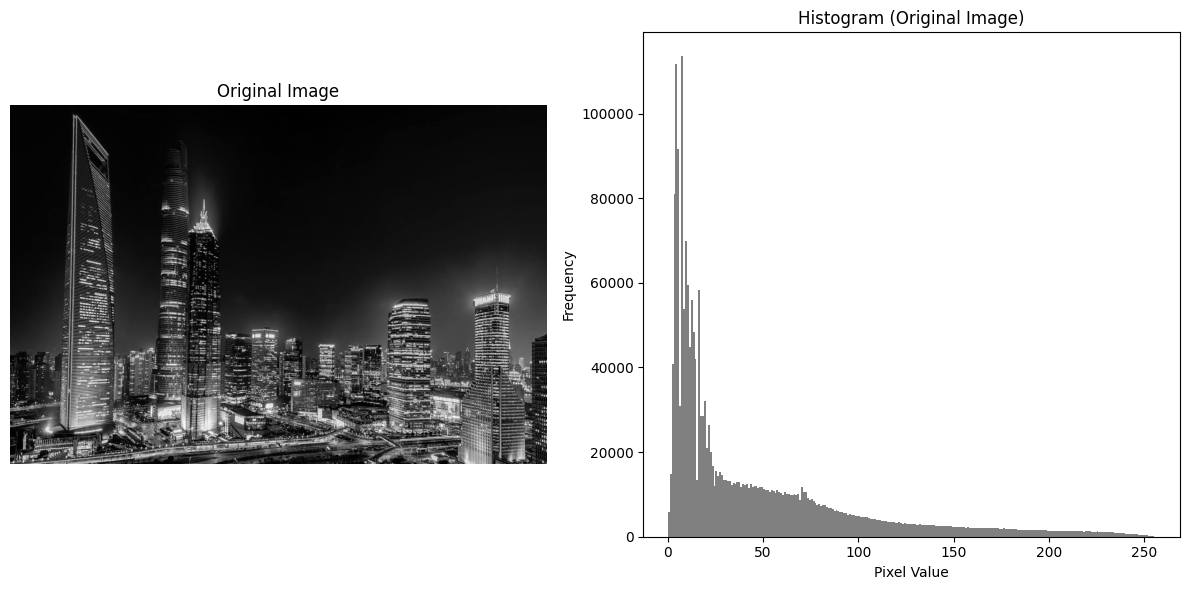

In [31]:
image_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Original Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


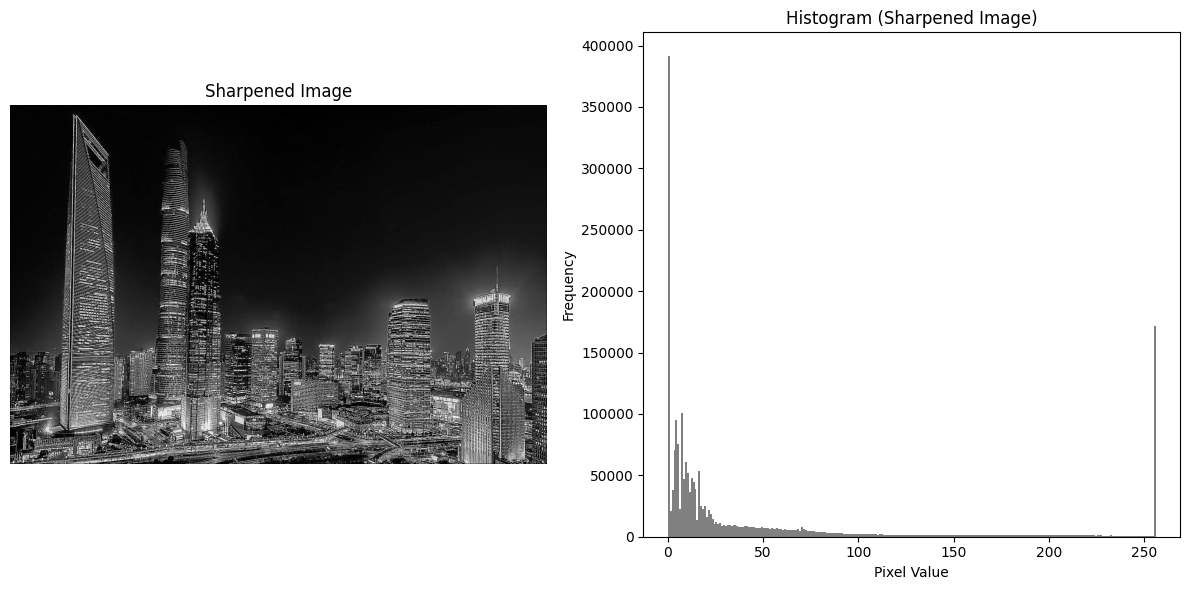

In [32]:
kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpened_image = np.zeros_like(image_gray)

height, width = image_gray.shape

for i in range(1, height-1):
    for j in range(1, width-1):
       
        region = image_gray[i-1:i+2, j-1:j+2]
    
        new_value = np.sum(region * kernel)
     
        sharpened_image[i, j] = np.clip(new_value, 0, 255) 

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(sharpened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Sharpened Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

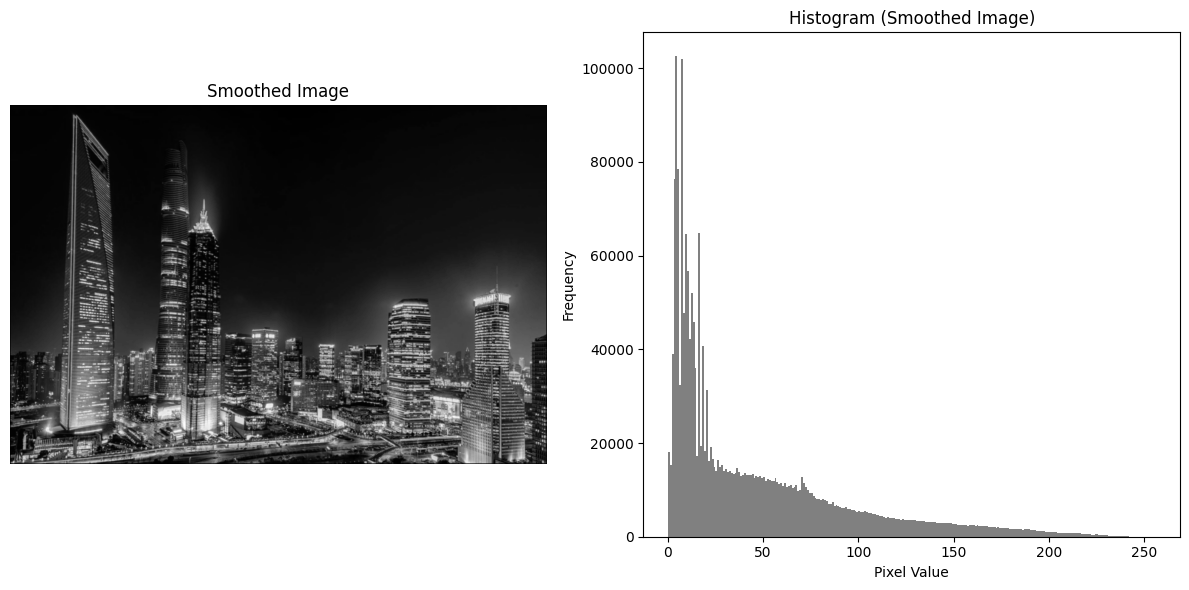

In [33]:
def gaussian_kernel(size, sigma):
    
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(- ((x - (size-1)//2)**2 + (y - (size-1)//2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

kernel_size = 5
sigma = 1.0
kernel = gaussian_kernel(kernel_size, sigma)

smoothed_image = np.zeros_like(image_gray)

for i in range(2, image_gray.shape[0] - 2):
    for j in range(2, image_gray.shape[1] - 2):
        region = image_gray[i-2:i+3, j-2:j+3]
        smoothed_image[i, j] = np.sum(region * kernel)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(smoothed_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Smoothed Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


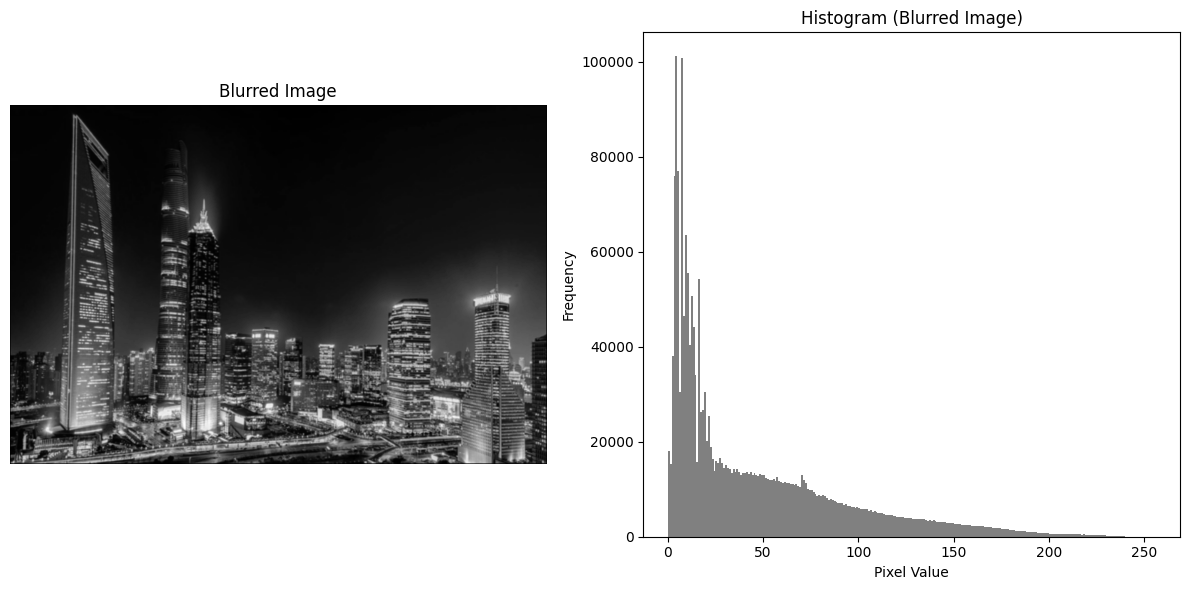

In [34]:
def box_blur(image, kernel_size=5):
    height, width = image.shape
    blurred_image = np.zeros_like(image)

    for i in range(kernel_size//2, height - kernel_size//2):
        for j in range(kernel_size//2, width - kernel_size//2):
            region = image[i - kernel_size//2:i + kernel_size//2 + 1, j - kernel_size//2:j + kernel_size//2 + 1]
            blurred_image[i, j] = np.mean(region)

    return blurred_image

blurred_image = box_blur(image_gray, kernel_size=5)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(blurred_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Blurred Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\kalim\AppData\Local\Temp\ipykernel_12280\192944430.py:8: RuntimeWarning: overflow encountered in scalar add
  new_value = image[i, j] + beta


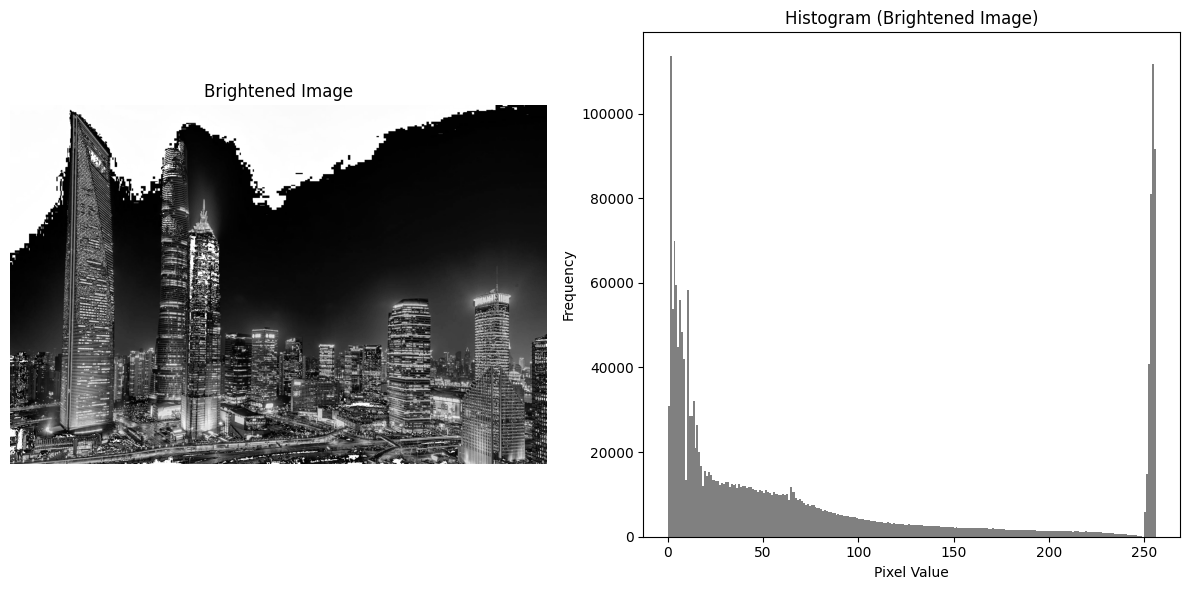

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness(image, beta=255):
    brightened_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            new_value = image[i, j] + beta
            if new_value > 255:
                brightened_image[i, j] = 255
            elif new_value < 0:
                brightened_image[i, j] = 0
            else:
                brightened_image[i, j] = new_value
    return brightened_image


brightened_image = adjust_brightness(image_gray, beta=250)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(brightened_image, cmap='gray')
plt.title('Brightened Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(brightened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Brightened Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


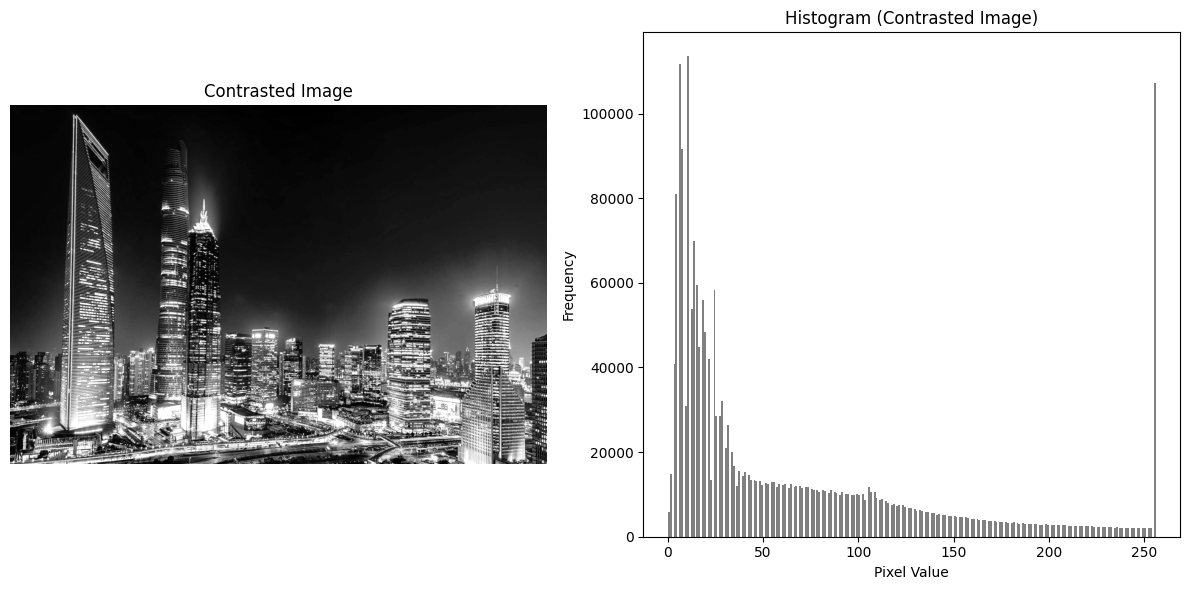

In [36]:
def adjust_contrast(image, alpha=1.5, beta=0):
    contrasted_image = np.zeros_like(image)

  
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
           
            new_value = alpha * image[i, j] + beta

          
            if new_value > 255:
                contrasted_image[i, j] = 255
            elif new_value < 0:
                contrasted_image[i, j] = 0
            else:
                contrasted_image[i, j] = new_value

    return contrasted_image

contrasted_image = adjust_contrast(image_gray, alpha=1.5, beta=0)
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(contrasted_image, cmap='gray')
plt.title('Contrasted Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(contrasted_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Contrasted Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

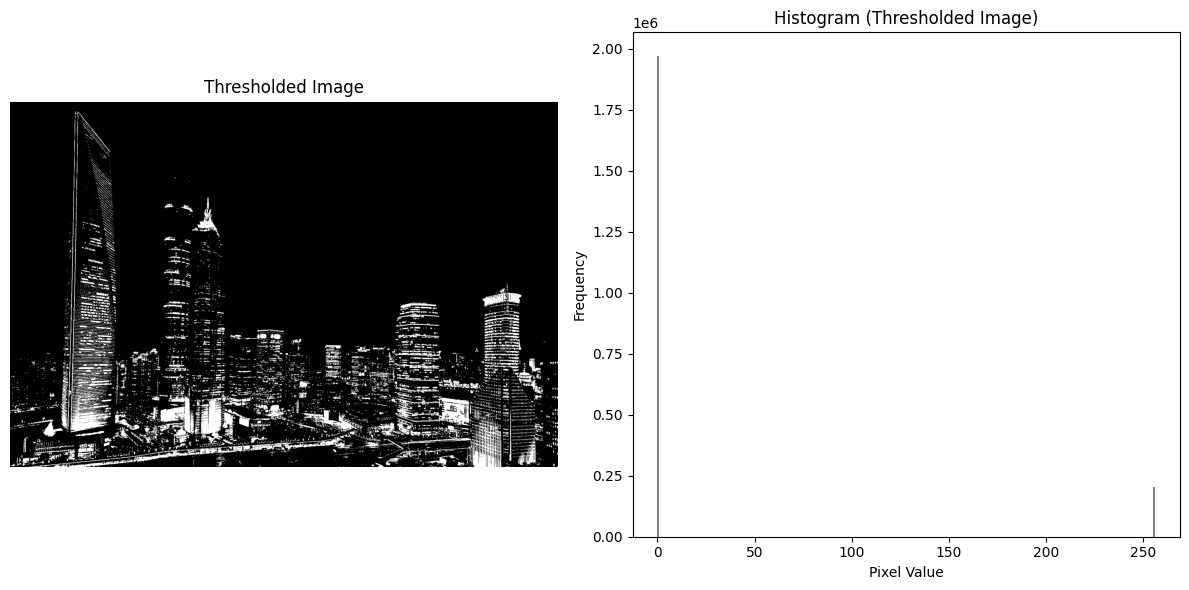

In [37]:
def threshold_image(image, thresh_value=128):
    thresholded_img = np.zeros_like(image)
    thresholded_img[image > thresh_value] = 255
    return thresholded_img

thresholded_image = threshold_image(image_gray)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')


plt.subplot(1, 2, 2)
plt.hist(thresholded_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Thresholded Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

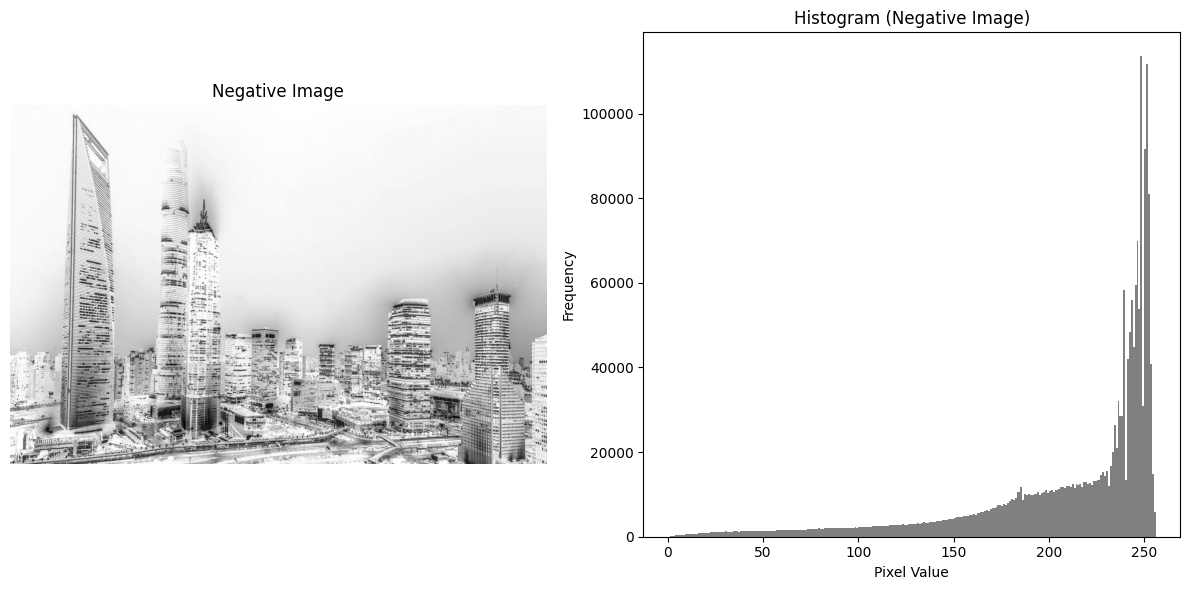

In [38]:
def negative_image(image):
    return 255 - image

negative_img = negative_image(image_gray)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(negative_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram (Negative Image)')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

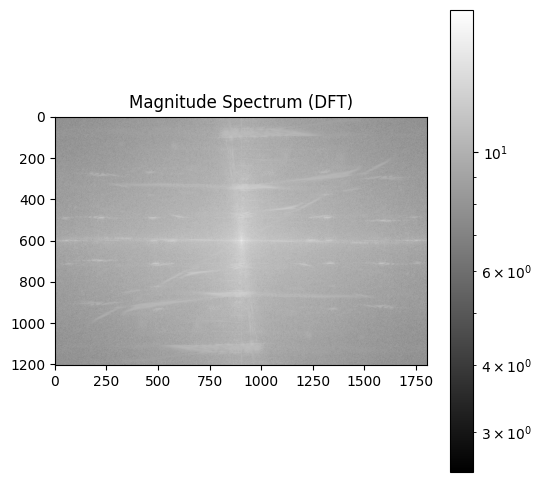

In [39]:
from matplotlib.colors import LogNorm
def plot_dft(image):
  
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    
    magnitude_spectrum = np.abs(dft_shift)
    
    magnitude_spectrum_log = np.log(magnitude_spectrum + 1)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(magnitude_spectrum_log, cmap='gray', norm=LogNorm())
    plt.title('Magnitude Spectrum (DFT)')
    plt.colorbar()
    plt.show()

plot_dft(image_gray)